# CS50 AI with Python

##  Lecture 1 - Knowledge

Knowledge-based agents
* Agents that reason by operating on internal representations of knowledge

An example inspired by Harry Potter:

*If it didn't rain, Harry visited Hagrid today.*

*Harry visited Hagrid or Dumbledore today, but not both.*

*Harry visited Dumbledore today.*

We can draw the solution that **Harry did not visit Hagrid today**.
We can also conclude that **it did rain**.

---

##### How can we make AI logical?

Sentence
* An assertion about the world in a knowledge representation language

---

###### Propositional Logic

Symbols:
* *P*
* *Q*
* *R*

Logical Connectives
* ¬
  * not
  * 
* ∧
  * and
* ∨
  * or
* → 
  * implication
* ↔ 
  * biconditional

Truth Table for these logical connectives:

|   p   |   q   |   ¬p  | p ∧ q | p ∨ q | p → q | p ⇔ q |
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|  True |  True | False |  True |  True |  True |  True |
|  True | False | False | False |  True | False | False |
| False |  True |  True | False |  True |  True | False |
| False | False |  True | False | False |  True |  True |

---

A model 
* Assignment of a truth value to every propositional symbol(a "possible world")

An example of a model.

*P*: It is raining
*Q*: It is a Tuesday

A model assigns a true or false value to these variables. One model or "possible world" is:

{P = true, Q = false}

----
Knowledge Base
* A set if sentences known by a knowledge-based agent

**Entailment**
* ```a ⊨ b```
  * Read Alpha entails Beta
* In every model in which sentence *a* is true, sentence *b* is also true.

---

#### Inference

**The process of deriving new sentences from old ones.**

Using our old example:

*If it didn't rain, Harry visited Hagrid today.*

*Harry visited Hagrid or Dumbledore today, but not both.*

*Harry visited Dumbledore today.*

We want our AI to infer these two statements: 

We can draw the solution that **Harry did not visit Hagrid today**.
We can also conclude that **it did rain**.

---

We will now use a new situation where:

***P***: It is a tuesday.
***Q***: It is raining.
***R***: Harry will go for a run.

KB(A knowledge base): ```(P ∧ ¬Q) → R```

What does that mean?

This means "If *it is a tuesday* **and** it is **not** *raining* **then** *Harry will go for a run*"

Out knowledge base has two other pieces of information:
* ***P*** is true
* ***Q*** is false

Using these pieces of information we can infer that ***R*** is true. 

---

This is the beginning of ***Inference Algorithms***. The question we have to ask is:

Does ```KB ⊨ a```? 

How can we write an algorithm to see if ***KB*** entails ***a***?

One of the easiest ways to do this is called **Model Checking**

----

#### Model Checking

* To determine if ```KB ⊨ ```:
  * Considerate all possible models.
  * If in every model where ***KB*** is true, ***a*** us true then ***KB*** ⊨ ***a***

***P***: It is a tuesday.  ***Q***: It is raining.  ***R***: Harry will go for a run.

KB:  ```(P ∧ ¬Q) → R```   ```P ¬Q```
Query:  ***R***

Table:

| ***P*** 	| ***Q*** 	| ***R*** 	| ***KB*** 	|
|---------	|---------	|---------	|----------	|
| false   	| false   	| false   	| false    	|
| false   	| false   	| true    	| false    	|
| false   	| true    	| false   	| false    	|
| false   	| true    	| true    	| false    	|
| true    	| false   	| false   	| false    	|
| true    	| false   	| true    	| true     	|
| true    	| true    	| false   	| false    	|
| true    	| true    	| true    	| false    	|

There is only one possible of world that we can say something about our knowledge base. The query and the knowledge base are both true. So we can conclude ***KB*** ⊨ ***a***

#### Putting it into code


In [ ]:
from logic import *

rain = Symbol("rain") # It is raining.
hagrid = Symbol("hagrid") # Harry visited Hagrid
dumbledore = Symbol("dumbledore") # Harry visited dumbledore

knowledge = And(
    Implication(Not(rain), hagrid),
    Or(hagrid, dumbledore),
    Not(And(hagrid, dumbledore)),
    dumbledore
)
print(knowledge.formula())
print(model_check(knowledge, rain))


((¬rain) => hagrid) ∧ (hagrid ∨  dumbledore) ∧ (¬(hagrid ∧ dumbledore)) ∧ dumbledore
True


### Knowledge Engineering

Making computers understand and solve human problems.

##### Clue

| People       	| Room     	| Weapons  	|
|--------------	|----------	|----------	|
| Col. Mustard 	| Ballroom 	| Knife    	|
| Prof. Plum   	| Kitchen  	| Revolver 	|
| Ms. Scarlet  	| Library  	| Wrench   	|

One person, one room, and one weapon was used to kill someone. The objective of the game is to find out *who* killed the person, *where* they killed them, and *what* they killed them with.

In the beginning of the game one of each is randomly selected to be put in an envelope. We need to solve the mystery using some logical process.

We do this by looking at some, but not all of the possibilities/cards.

----

In order for a computer to play this game, and get good it at we have to look at a few things first.

**Propositional Symbols**

*mustard* 	 *ballroom* 	 *knife* </br>   	
*plum*   	 *kitchen*  	 *revolver* </br>	
*scarlet*  	 *library*  	 *wrench*</br>


Next, there has to be propositional sentences:

```(mustard ∨ plum ∨ scarlet)``` </br>
                
```(ballroom ∨ kitchen ∨ library)``` </br>
                
```(knife ∨ revolver ∨ wrench)``` </br>

---

The gameplay progresses by getting cards. Since we know if we have a card, that card can not be in the envelope, and there fore is no the solution.

From that we can deduct that ```¬that card```.

Let's apply this concept into code:

In [4]:
pip install termcolor

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: C:\Users\nirva\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import termcolor

from logic import *

mustard = Symbol("ColMustard")
plum = Symbol("ProfPlum")
scarlet = Symbol("MsScarlet")
characters = [mustard, plum, scarlet]

ballroom = Symbol("ballroom")
kitchen = Symbol("kitchen")
library = Symbol("library")
rooms = [ballroom, kitchen, library]

knife = Symbol("knife")
revolver = Symbol("revolver")
wrench = Symbol("wrench")
weapons = [knife, revolver, wrench]

symbols = characters + rooms + weapons

# All the possible characters

def check_knowledge(knowledge):
    for symbol in symbols:
        if model_check(knowledge, symbol):
            termcolor.cprint(f"{symbol}: YES", "green")
        elif not model_check(knowledge, Not(symbol)):
            print(f"{symbol}: MAYBE")

# There must be a person, room, and weapon.
knowledge = And(
    Or(mustard, plum, scarlet),
    Or(ballroom, kitchen, library),
    Or(knife, revolver, wrench)
)

# Initial cards
knowledge.add(And(
    Not(mustard), Not(kitchen), Not(revolver)
))

# Unknown card
knowledge.add(Or(
    Not(scarlet), Not(library), Not(wrench)
))

# Known cards
knowledge.add(Not(plum))
knowledge.add(Not(ballroom))

check_knowledge(knowledge)


MsScarlet: YES
library: YES
knife: YES


Using logical elimination, the computer solved the mystery.

Explanation of Gameplay & Logic
1. In the beginning of the code the ***KB*** knows that it must be one person, one place, and one weapon.
2. Our initial cards rule out Col. Mustard, the Kitchen, and the Revolver.
3. Another player guesses Scarlet, the Library, and the Wrench. We know least one of these guesses is wrong.
4. Over the course of the rest of the game we get two more cards that we know for sure are not it: Plum & the Ballroom.

As humans, we might not have reached this conclusion right away. The AI, via the model checking algorithm was able to know because it is strictly based on math and facts.


---

#### Logic Puzzles

A logic puzzle is where you have to puzzle your way through trying to figure something out.

##### Example

* Gilderoy, Pomona, Minerva, and Horace, each belong a different one of the four houses, Gryffindor, Hufflepuff, Ravenclaw, and Slytherin. 
* Gilderoy belongs to either Gryffindor or Ravenclaw.
* Pomona does not belong in Slytherin.
* Minerva belongs to Gryffindor


**Propositional Symbols**

| Name</br> House 	| Gilderoy           	| Minerva           	| Pomona           	    | Horace           	    |
|-----------------	|--------------------	|-------------------	|------------------	    |------------------	    |
| Gryffindor      	| *GilderoyGryffindor* 	| *MinervaGryffindor* 	| *PomonaGryffindor* 	| *HoraceGryffindor* 	|
| Slytherin       	| *GilderoySlytherin*  	| *MinervaSlytherin*  	| *PomonaSlytherin*  	| *HoraceSlytherin*  	|
| Ravenclaw       	| *GilderoyRavenclaw* 	| *MinervaRavenclaw*  	| *PomonaRavenclaw*  	| *HoraceRavenclaw*  	|
| Hufflepuff      	| *GilderoyHufflepuff* 	| *MinervaHufflepuff* 	| *PomonaHufflepuff* 	| *HoraceHufflepuff* 	|

We can make logical sentences such as (PomonaGryffindor → ¬PomonaHufflepuff), because if we know Pomona is in Gryffindor, Pomona can not be in Hufflepuff. This leads to many of these statements like you can see below:

```(MinervaGryffindor → ¬MinervaHufflepuff) ∧ (MinervaGryffindor → ¬MinervaRavenclaw) ∧ (MinervaGryffindor → ¬MinervaSlytherin) ∧ (MinervaHufflepuff → ¬MinervaGryffindor)```

Since one of the pieces of information stated that Gilderoy, Pomona, Minerva, and Horace, each belong a different one of the four houses, statements like the one below also exist. 

```(MinervaHufflepuff → ¬HoraceHufflepuff)```

If Minerva is in Hufflepuff, then Horace can not be in Hufflepuff.

There are also other sentence given to us that can be represented like this:

```(GilderoyGryffindor ∨ GilderoyRavenclaw)``
```(¬PomonaSlytherin)```
```(MinervaGryffindor)```

This logic puzzle implemented in code looks like the following:

In [11]:
from logic import *

people = ["Gilderoy", "Pomona", "Minerva", "Horace"]
houses = ["Gryffindor", "Hufflepuff", "Ravenclaw", "Slytherin"]

symbols = []

knowledge = And()

for person in people:
    for house in houses:
        symbols.append(Symbol(f"{person}{house}"))

# Each person belongs to a house.
for person in people:
    knowledge.add(Or(
        Symbol(f"{person}Gryffindor"),
        Symbol(f"{person}Hufflepuff"),
        Symbol(f"{person}Ravenclaw"),
        Symbol(f"{person}Slytherin")
    ))

# Only one house per person.
for person in people:
    for h1 in houses:
        for h2 in houses:
            if h1 != h2:
                knowledge.add(
                    Implication(Symbol(f"{person}{h1}"), Not(Symbol(f"{person}{h2}")))
                )

# Only one person per house.
for house in houses:
    for p1 in people:
        for p2 in people:
            if p1 != p2:
                knowledge.add(
                    Implication(Symbol(f"{p1}{house}"), Not(Symbol(f"{p2}{house}")))
                )

knowledge.add(
    Or(Symbol("GilderoyGryffindor"), Symbol("GilderoyRavenclaw"))
)

knowledge.add(
    Not(Symbol("PomonaSlytherin"))
)

knowledge.add(
    Symbol("MinervaGryffindor")
)

for symbol in symbols:
    if model_check(knowledge, symbol):
        print(symbol)


GilderoyRavenclaw
PomonaHufflepuff
MinervaGryffindor
HoraceSlytherin


#### Mastermind

There are 4 colors: red, blue, green and yellow. They are in some random order. The player's job is to guess the order, and then another person tells them how many of the 4 colors they got in the right position. This goes on until Player 1 can guess the order. The objective is to get the order in the least amount of guesses.

We can encode this game into code too.

In [12]:
from logic import *

colors = ["red", "blue", "green", "yellow"]
symbols = []
for i in range(4):
    for color in colors:
        symbols.append(Symbol(f"{color}{i}"))

knowledge = And()

# Each color has a position.
for color in colors:
    knowledge.add(Or(
        Symbol(f"{color}0"),
        Symbol(f"{color}1"),
        Symbol(f"{color}2"),
        Symbol(f"{color}3")
    ))

# Only one position per color.
for color in colors:
    for i in range(4):
        for j in range(4):
            if i != j:
                knowledge.add(Implication(
                    Symbol(f"{color}{i}"), Not(Symbol(f"{color}{j}"))
                ))

# Only one color per position.
for i in range(4):
    for c1 in colors:
        for c2 in colors:
            if c1 != c2:
                knowledge.add(Implication(
                    Symbol(f"{c1}{i}"), Not(Symbol(f"{c2}{i}"))
                ))

knowledge.add(Or(
    And(Symbol("red0"), Symbol("blue1"), Not(Symbol("green2")), Not(Symbol("yellow3"))),
    And(Symbol("red0"), Symbol("green2"), Not(Symbol("blue1")), Not(Symbol("yellow3"))),
    And(Symbol("red0"), Symbol("yellow3"), Not(Symbol("blue1")), Not(Symbol("green2"))),
    And(Symbol("blue1"), Symbol("green2"), Not(Symbol("red0")), Not(Symbol("yellow3"))),
    And(Symbol("blue1"), Symbol("yellow3"), Not(Symbol("red0")), Not(Symbol("green2"))),
    And(Symbol("green2"), Symbol("yellow3"), Not(Symbol("red0")), Not(Symbol("blue1")))
))

knowledge.add(And(
    Not(Symbol("blue0")),
    Not(Symbol("red1")),
    Not(Symbol("green2")),
    Not(Symbol("yellow3"))
))

for symbol in symbols:
    if model_check(knowledge, symbol):
        print(symbol)


red0
blue1
yellow2
green3


We are eventually able to get the order of these 4 colors out. As you can see, this cod took 3.1 seconds from start to finish. Model Checking is not a very efficient way to do this especially when there are more variables.

#### Inference Rules

Inference rules are usually represented using a horizontal bar that separates the top part, what we know, from the bottom part, what knowledge can be inferred from this. 

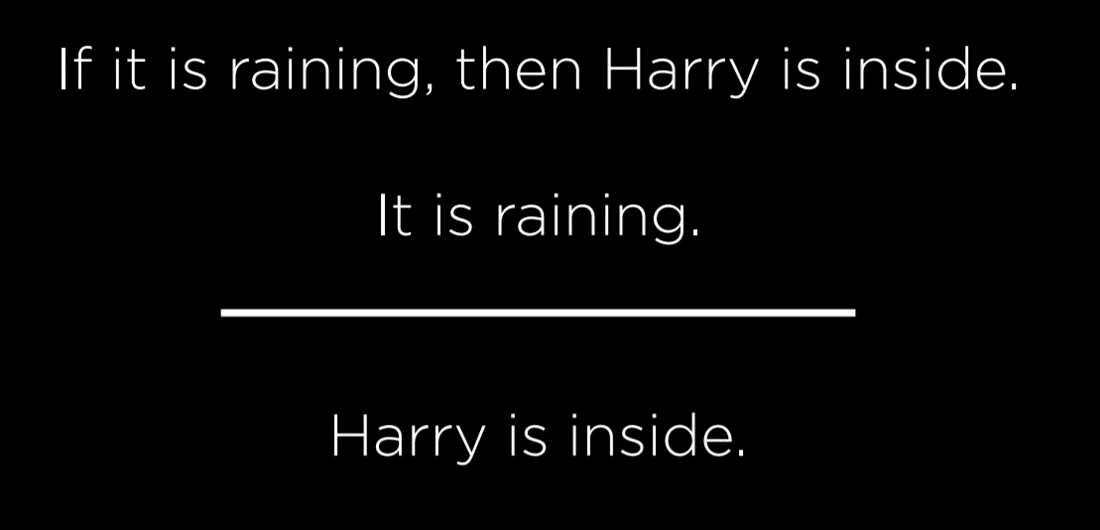

This rule is called **Modus Ponens**. It is phrased in logic as the following:

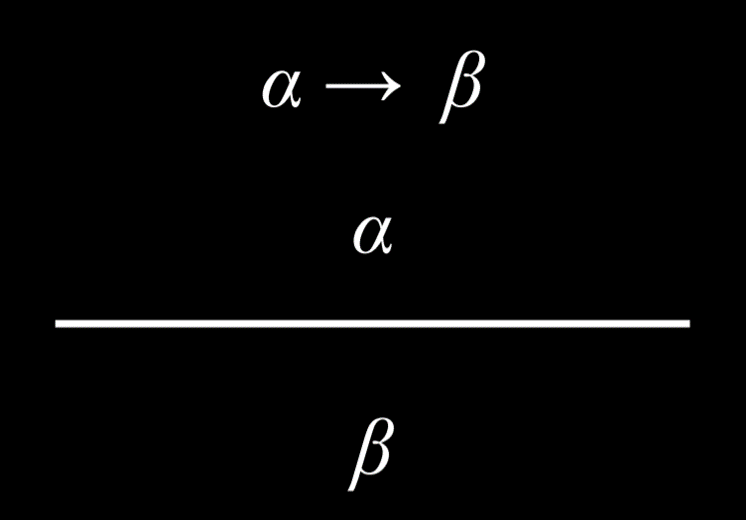

---

**And Elimination** says that if *a* and *B* are true then *a* is true.

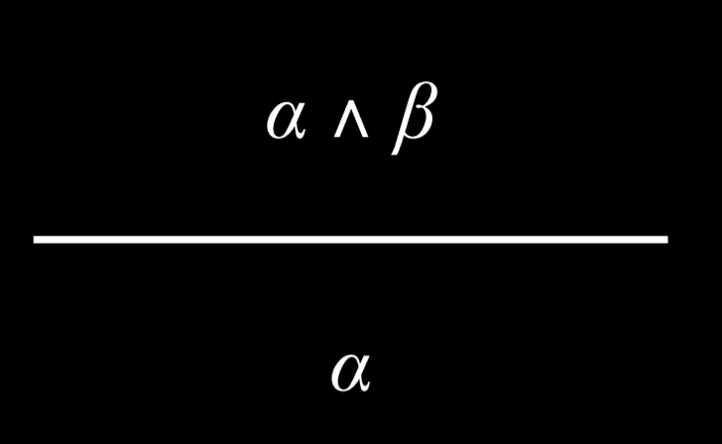

---

**Double Negation Elimination** is the concept where if we have two "nots" or two negatives then cancel each other out.

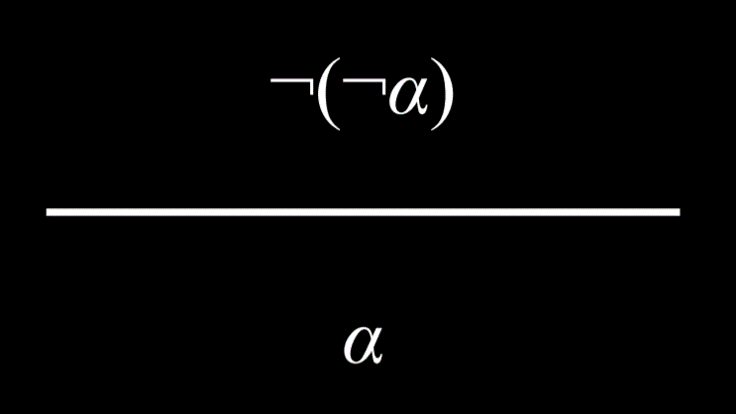

---

**Implication Elimination** says that if *P* implies *Q*, either ¬*P* or *Q* is true.

Since this one is a little more complicated there is a table:

| P     	| Q     	| P → Q 	| ¬P ∨ Q 	|
|-------	|-------	|-------	|--------	|
| false 	| false 	| true  	| true   	|
| false 	| true  	| true  	| true   	|
| true  	| false 	| false 	| false  	|
| true  	| true  	| true  	| true   	|

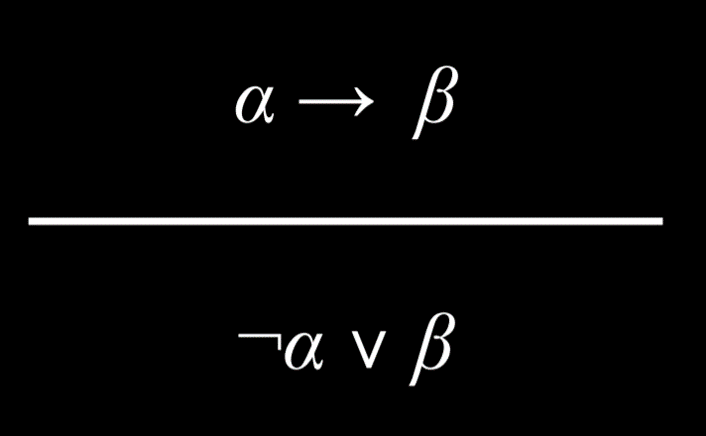

----

**Biconditional Elimination** is a concept that means if a biconditional proposition(*a* ↔ *B*) is equivalent to *B* implies *a*, and *a* implies *B*.

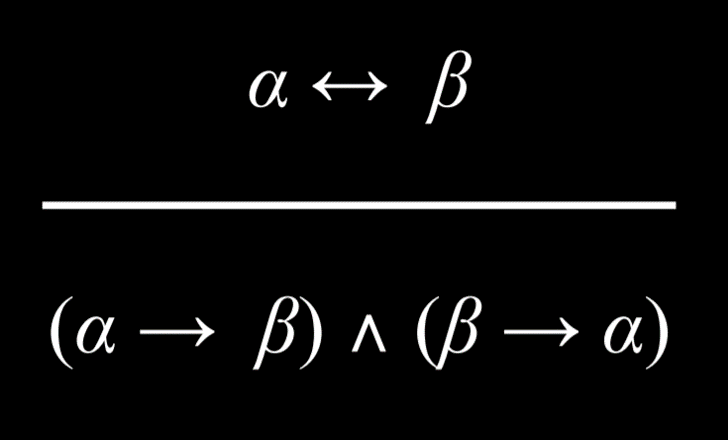

---

**De Morgan's Law** states that the statement not(¬)(*a* and(∧) *B*) is equivalent to not(¬)(*a*) or(∨) not(¬)(*B*)

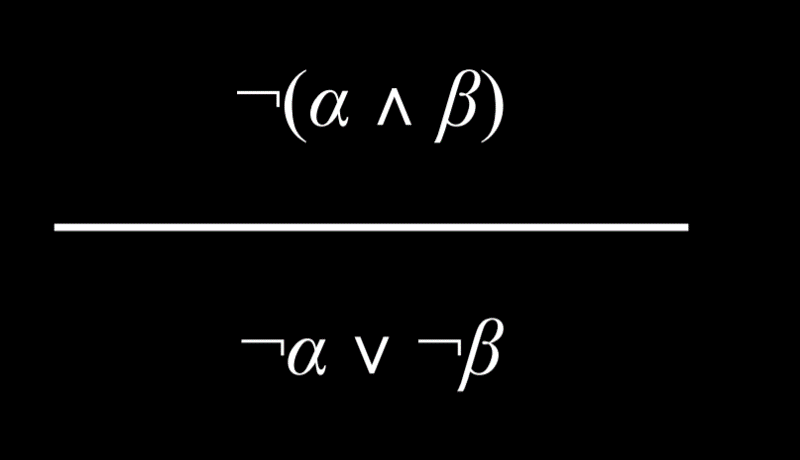

Similarly, the reverse is also true. 

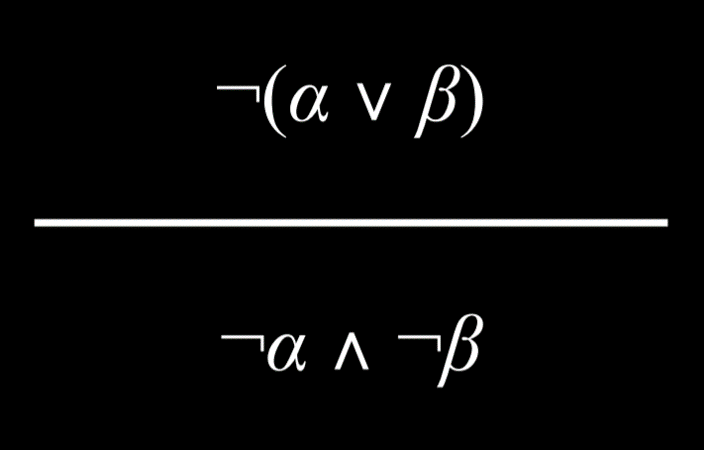

---

**The Distributive Property** states that you can distribute connectives like such: (*a* ∧ (*B* ∨ *y*)) to   (*a* ∧ *B*) ∨ (*a* ∧ *y*)

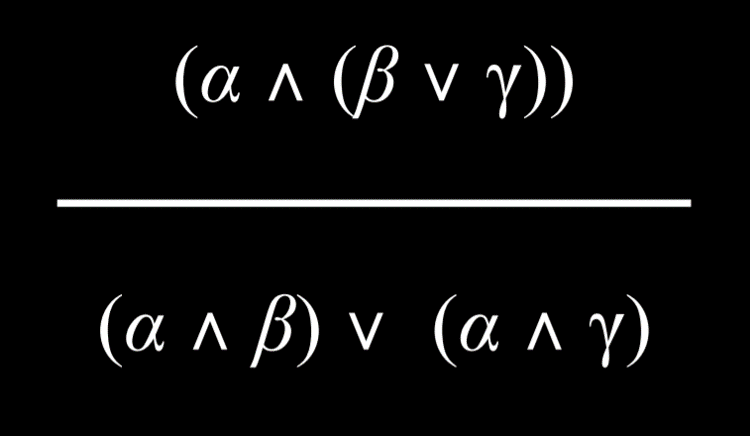

---

A way to apply these inference is rules is **Theorem Proving**. We can treat theorem proving as a search problem.

##### Theorem Proving
* Initial state: Starting knowledge base
* Actions: Inference rules
* Transition model: New knowledge base after inference 
* Goal test: check statement we're trying to prove
* Path cost function: Number of steps in proof

---

##### Resolution  

**Resolution** is quite a powerful inference rule. Resolution states that if we now either *P* or *Q* is true(*P* ∨ *Q*) and ¬*P*, then *Q* has to be true. Or in more formal terms:

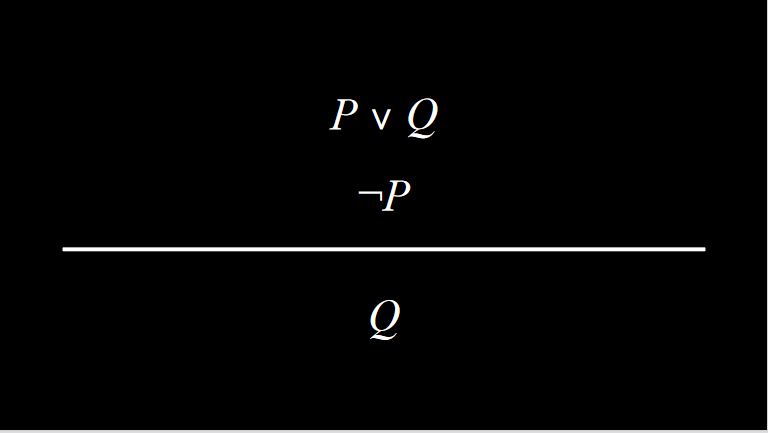

---



A way we can use resolution is written below:

(Ron is in the Great Hall) ∨ (Hermione is in the library)

(Ron is not in the Great Hall) ∨ (Harry is sleeping)

----------=---------------------------------------------------=-

(Ron is in the Great Hall) ∨ (Harry is sleeping)